# Notes for 29 September 

Today we'll do more with images

In [1]:
%matplotlib inline
import numpy as np
import pylab

First let's grab an image of Frederick Phillips Brooks, founder of the CS department and a great man.

In [5]:
import urllib
urllib.request.urlretrieve('https://cs.unc.edu/Courses/comp116-f17/media/fpb.jpg', filename='fpb.jpg')

('fpb.jpg', <http.client.HTTPMessage at 0x7fdc38c884a8>)

Then we can read it with a function from pylab. The image is a 3D array. (rows, columns, channels)

In [6]:
fpb = pylab.imread('fpb.jpg')
print(fpb.shape)

(165, 305, 3)


And we can display it with our usual helper.

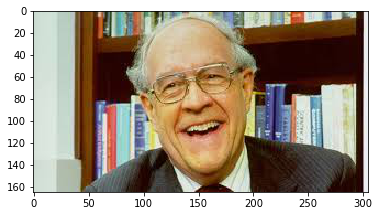

In [4]:
def show(im):
    pylab.imshow(im, cmap=pylab.gray(), interpolation='none')
    
show(fpb)

The image is just an array of numbers. Three for each pixel. The numbers represent the intensity of the Red, Green, and Blue components of the color.

In [7]:
fpb[0,:,:]

array([[202, 218, 208],
       [202, 218, 208],
       [203, 219, 209],
       [204, 220, 210],
       [205, 221, 211],
       [206, 222, 212],
       [207, 223, 213],
       [208, 224, 214],
       [206, 222, 212],
       [206, 222, 212],
       [206, 222, 212],
       [207, 223, 213],
       [207, 223, 213],
       [207, 223, 213],
       [208, 224, 214],
       [208, 224, 214],
       [207, 227, 216],
       [205, 225, 214],
       [205, 225, 214],
       [206, 226, 215],
       [206, 226, 215],
       [201, 221, 210],
       [191, 211, 200],
       [182, 202, 191],
       [183, 203, 192],
       [183, 203, 192],
       [183, 203, 192],
       [183, 203, 192],
       [182, 202, 191],
       [182, 202, 191],
       [182, 202, 191],
       [181, 201, 190],
       [177, 206, 176],
       [181, 206, 185],
       [179, 198, 192],
       [185, 196, 198],
       [192, 196, 197],
       [189, 187, 175],
       [124, 117,  88],
       [ 99,  84,  43],
       [102,  81,  36],
       [122,  92

We can look at a single channel. For example here is the green channel. It doesn't look green because it is only green in the original because of its position in the 3d array relative to red and blue.

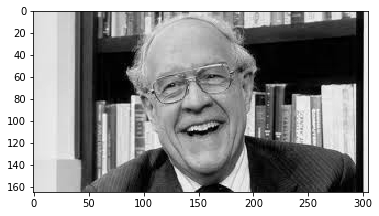

In [8]:
show(fpb[:,:,1])

We can plot the values of a single channel for a row. High numbers are bright and low numbers are dark.

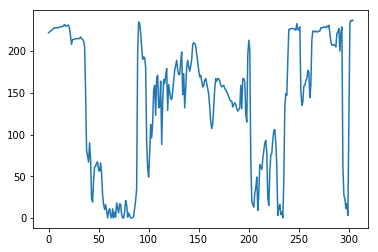

In [9]:
pylab.plot(fpb[80,:,1])

I can make the green channel appear green by embeding it in a 3d image with red and blue set to 0. 

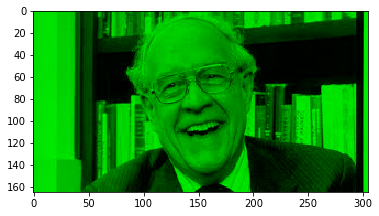

In [10]:
fpbg = fpb.copy()
fpbg[:,:,0] = 0
fpbg[:,:,2] = 0
show(fpbg)

In [11]:
fpb.shape

(165, 305, 3)

I'll call the green channel g.

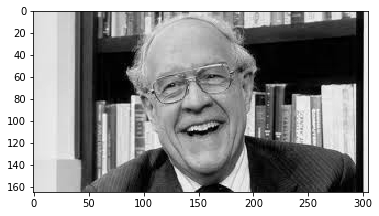

In [12]:
g = fpb[:,:,1]
show(g)

We can lower the resolution by skipping pixels. This is 1/2 resolution.

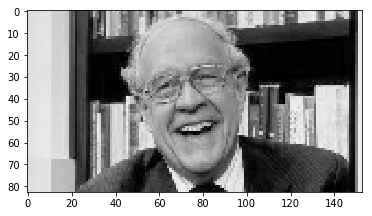

In [13]:
show(g[::2, ::2])

1/4 resolution.

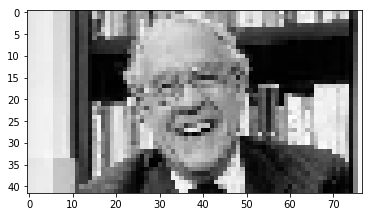

In [14]:
show(g[::4, ::4])

1/8.

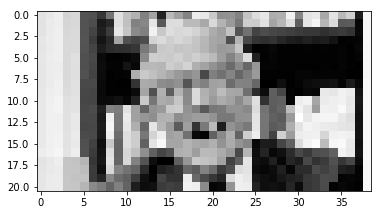

In [15]:
show(g[::8, ::8])

I can see the maximum value is 245.

In [16]:
np.max(g)

254

And the minimum (black) is 0.

In [17]:
np.min(g)

0

Let's create a new image that is scaled so it goes from 0 to 1. We're just dividing by 254 (the max). Note that it looks the same. That is because our showim function scales the image so the smallest value is black and the largest is white.

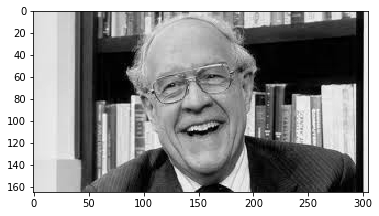

In [18]:
gs = g / 254.0
show(gs)

In [19]:
np.max(gs)

1.0

We can convert the image into a **binary** image by **thresholding**. We are comparing to 0.5. Everything greater is True and everything less is False.

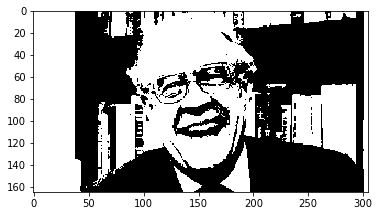

In [20]:
gb = gs > 0.5
show(gb)

I can see the effect of different thresholds.

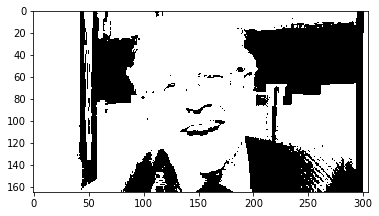

In [21]:
show(gs > 0.25)

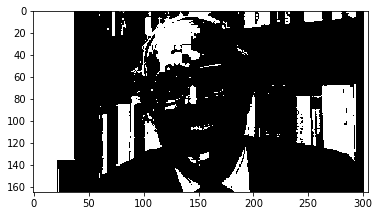

In [22]:
show(gs > 0.75)

In [23]:
gb.dtype

dtype('bool')

Now the numbers have been replaced by bools.

In [25]:
gb[0,:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,

We can look at random noise by using the random number generator. 

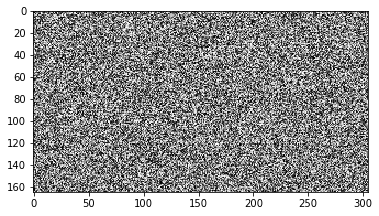

In [26]:
show(np.random.random((165,305)))

By adding some noise to the image before thresholding we can get an image that looks to our eyes like it has more levels than just white and black.

I'm subtracting 0.5 from the random image to make the **mean** be near 0.

I'm scaling by 0.3 to change the magnitude of the noise I am adding. 

Try changing the 0.3 to different values.

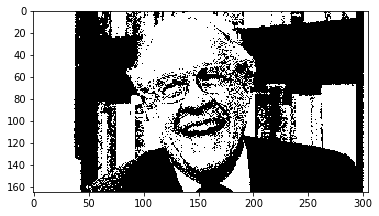

In [36]:
show(gs + 0.3 * (np.random.random((165,305)) - 0.5) > 0.5)